* 1. LIMPIEZA DE DATOS

In [42]:
# Codigo para generar los datos
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             300 non-null    int64 
 1   app_version         300 non-null    object
 2   platform            300 non-null    object
 3   session_duration    300 non-null    int64 
 4   number_of_sessions  300 non-null    int64 
 5   country             300 non-null    object
 6   user_feedback       300 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 16.5+ KB


In [44]:
data = pd.read_csv("user_app_data.csv")
data.head()

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3


In [46]:
# Reviso si hay filas duplicadas.
data.duplicated().sum()

np.int64(0)

* Esto nos indica que no hay columnas duplicadas

In [47]:
# Reviso si hay datos que faltanten.
data.isnull().sum()

,0
user_id,0
app_version,0
platform,0
session_duration,0
number_of_sessions,0
country,0
user_feedback,0


* No se observa que falten datos.

#  Normalizo los valores de las columnas categóricas

In [49]:
# Reviso las columnas categóricas: app_version, platform y country
data["app_version"] = data["app_version"].astype(str).str.strip().str.lower()
data["platform"] = data["platform"].astype(str).str.strip().str.lower()
data["country"] = data["country"].astype(str).str.strip().str.lower()

* Con esto hago la limpieza de mis valores categóricos:
cambié los datos a minúsculas y eliminé los espacios en blanco para evitar inconsistencias.

In [50]:
# Compruebo los datos
data["app_version"].unique()

array(['1.2', '1.3', '1.0', '1.1'], dtype=object)

In [51]:
data["platform"].unique()

array(['android', 'ios'], dtype=object)

In [52]:
data["country"].unique()

array(['france', 'uk', 'canada', 'germany', 'mexico', 'usa', 'spain',
       'italy'], dtype=object)

* Decidí mantener "app_version" como tipo object y no float para evitar perder precisión, por ejemplo, al convertir "1.10" a float quedaría como "1.1", lo cual es incorrecto.
* Procedí a normalizar el formato en letras minúsculas de las columnas categóricas para asegurarme que no haya inconsistencias.

# Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).

In [53]:
data["session_duration"].describe().round(4)

,session_duration
count,300.0000
mean,95.8400
std,51.9228
min,1.0000
25%,51.2500
50%,100.5000
75%,141.2500
max,179.0000


* No se detectan valores inapropiados o inusuales, tampoco valores extremos, ya que todas las duraciones están dentro del rango esperado de 1 a 179 minutos que es el valor máximo encontrado.


*2. EXPLORACION DE DATOS
* El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:

 a) Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [54]:
data.value_counts("platform")

,count
platform,
ios,163
android,137


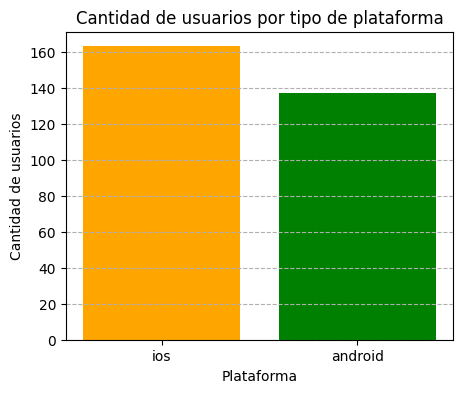

In [56]:
import matplotlib.pyplot as plt

# Gráfico 1: Análisis de la cantidad de usuarios por tipo de plataforma
Cantidad= data["platform"].value_counts()

# Gráfico de barras
plt.figure(figsize=(5, 4))
plt.bar(Cantidad.index, Cantidad.values, color=['orange', 'green'])
plt.title("Cantidad de usuarios por tipo de plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Cantidad de usuarios")
plt.grid(axis="y", linestyle="--")

# Mostrar
plt.show()

* Tanto para la plataforma Android como iOS tienen similar cantidad de usuarios. La diferencia es moderada, no extrema.


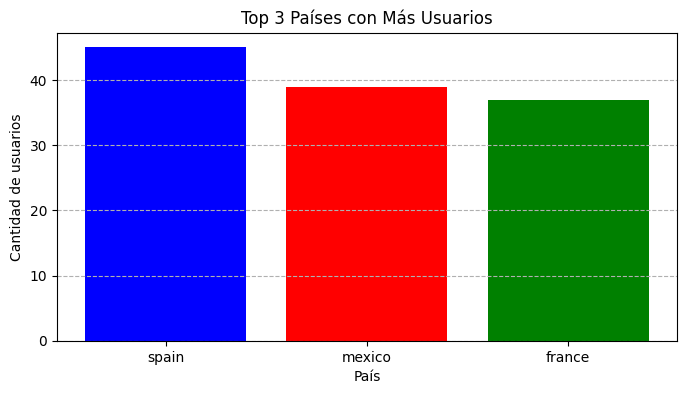

In [57]:
# Gráfico 2: TOP 3 Países con más usuarios

Paises = data["country"].value_counts().head(3)

plt.figure(figsize=(8, 4))
plt.bar(Paises.index, Paises.values, color= ["blue", "red", "green"])
plt.title('Top 3 Países con Más Usuarios')
plt.xlabel('País')
plt.ylabel('Cantidad de usuarios')
plt.grid(axis="y", linestyle="--")

# Mostrar
plt.show()

* En el Gráfico se puede observar que los paíse con más usuarios son españa, México y Francia.

b) Crear dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

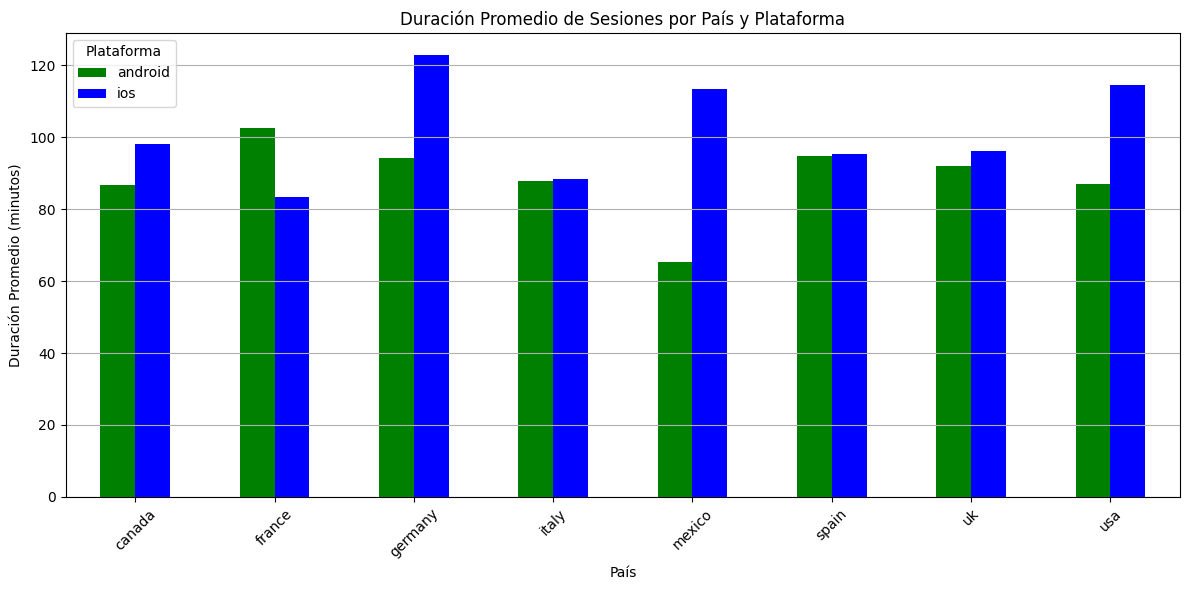

In [73]:
# Gráfico 1
# Primero agrupo los datos para analizar: duración promedio de sesión por país y plataforma
grupo = data.groupby(['country', 'platform'])['session_duration'].mean().unstack()

# Crear gráfico
grupo.plot(kind="bar", figsize=(12, 6), color=["green", "blue"])

plt.title("Duración Promedio de Sesiones por País y Plataforma")
plt.xlabel("País")
plt.ylabel("Duración Promedio (minutos)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.legend(title='Plataforma')

plt.tight_layout()

# Mostrar
plt.show()


* Interpretación del gráfico:
Podemos observar que Alemania, México y USA son los países que más duración tienen en promedio de la plataforma iOs (más de 100 minutos).
* Los tiempos de sesión son practicamente similares entre ambas plataformas en Italia, lo mismo ocurre en españa y UK. No hay diferencias significativas.

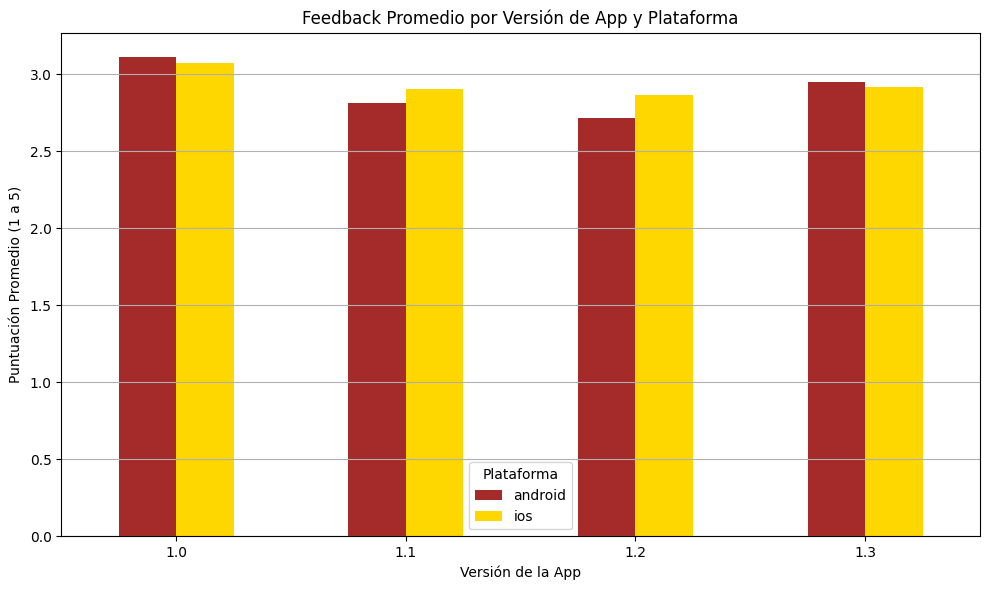

In [78]:
# Gráfico 2
# Agrupo por app_version y plataforma, y calculo el feedback promedio
Grupo_feedback = data.groupby(["app_version", "platform"])["user_feedback"].mean().unstack()

# Creo el gráfico
Grupo_feedback.plot(kind="bar", figsize=(10, 6), color=["brown", "gold"])

plt.title("Feedback Promedio por Versión de App y Plataforma")
plt.xlabel("Versión de la App")
plt.ylabel("Puntuación Promedio (1 a 5)")
plt.legend(title="Plataforma")
plt.grid(axis="y")
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar
plt.show()

* Interpretación del Gráfico: Todas las barras tienen un tamaño similar, lo que indica que los usuarios dieron puntuaciones parecidas, sin importar la versión de la app o la plataforma (iOS/Android).
* No hay una versión que destaque como la mejor o peor, ni tampoco hay grandes diferencias entre plataformas.
